In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import polyfit
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

Saving monthly_csv.csv to monthly_csv.csv


In [2]:
# https://datahub.io/core/global-temp

temperatures = pd.read_csv('monthly_csv.csv')
temperatures['Date'] = pd.to_datetime(temperatures['Date'])
temperatures = temperatures.pivot('Date', 'Source', 'Mean')

In [3]:
temperatures['GCAG'].index.month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=1644)

In [4]:
# fit polynomial: E = \sum_{j=0}^k |p(x_j) - y_j|^2

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X = list(range(len(s)))  # (s.index.year - s.index.year.min()).values
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)


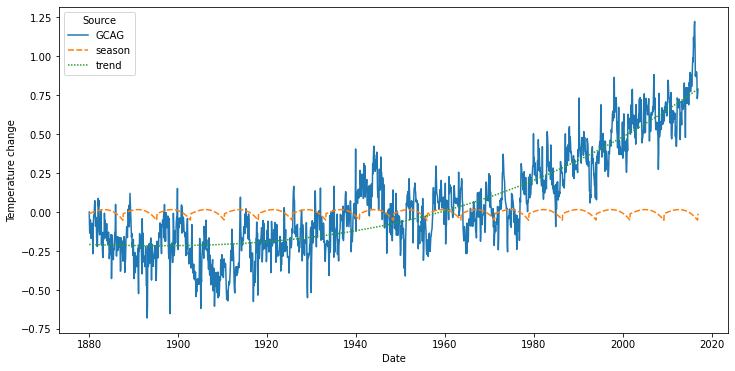

In [5]:
plt.figure(figsize=(12, 6))
temperatures['trend'] = get_trend(temperatures['GCAG'])
temperatures['season'] = get_season(temperatures['GCAG'] - temperatures['trend'])
sns.lineplot(data=temperatures[['GCAG', 'season', 'trend']])
plt.ylabel('Temperature change');